# PGA Tour Project - Data Science Programming

Group Members:
* Akshat Johari
* Kolton Fowler
* Prakhar Bansal
* Shreya Bhootda

In [167]:
import pandas as pd
import numpy as np
from pandas import Series
import re
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
pd.options.mode.chained_assignment = None

In [168]:
# read in the data
golfData = pd.read_csv('pgaTourData.csv')
golfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

Column Definition:
* Player Name: Name of the golfer
* Rounds: The number of games that a player played
* Fairway Percentage: The percentage of time a tee shot lands on the fairway
* Year: The year in which the statistic was collected
* Avg Distance: The average distance of the tee-shot
* gir: (Green in Regulation) is met if any part of the ball is touching the putting surface while the number of strokes taken is at least two fewer than par
* Average Putts: The average number of strokes taken on the green
* Average Scrambling: Scrambling is when a player misses the green in regulation, but still makes par or better on a hole
* Average Score: Average Score is the average of all the scores a player has played in that year
* Points: The number of FedExCup points a player earned in that year. These points can be earned by competing in tournaments.
* Wins: The number of competition a player has won in that year
* Top 10: The number of competitions where a player has placed in the Top 10
* Average SG Putts: Strokes gained: putting measures how many strokes a player gains (or loses) on the greens.
* Average SG Total: The Off-the-tee + approach-the-green + around-the-green + putting statistics combined
* SG:OTT: Strokes gained: off-the-tee measures player performance off the tee on all par-4s and par-5s.
* SG:APR: Strokes gained: approach-the-green measures player performance on approach shots. Approach shots include all shots that are not from the tee on par-4 and par-5 holes and are not included in strokes gained: around-the-green and strokes gained: putting. Approach shots include tee shots on par-3s.
* SG:ARG: Strokes gained: around-the-green measures player performance on any shot within 30 yards of the edge of the green. This statistic does not include any shots taken on the putting green.
* Money: The amount of prize money a player has earned from tournaments


<AxesSubplot:>

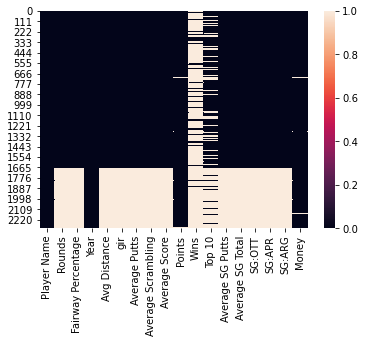

In [169]:
sns.heatmap(golfData.isnull())

In [64]:
# Dropping rows for which there is no data
cleanedGolf = golfData.dropna(how = 'any', subset = ['Rounds'])

# Filling 0 wins for players who have won nothing in the year
cleanedGolf['Wins'] = cleanedGolf['Wins'].fillna(0)

# Filling 0 wins for players who have won nothing in the year
cleanedGolf['Top 10'] = cleanedGolf['Top 10'].fillna(0)

cleanedGolf.sample(5)

Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
650   Charlie Beljan    76.0               62.61  2015         309.8  65.51   
1015  Kevin Chappell    80.0               61.52  2013         292.9  66.11   
152   Jamie Lovemark    92.0               56.92  2018         303.2  64.65   
1266  Dustin Johnson    70.0               56.30  2012         310.2  65.75   
186   Derek Fathauer    84.0               53.27  2018         289.1  60.35   

      Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
650           29.97               48.77         72.010    369   0.0     1.0   
1015          29.44               58.40         70.927    689   0.0     3.0   
152           28.64               61.07         70.734    576   0.0     3.0   
1266          28.64               60.29         69.564  1,097   1.0     5.0   
186           28.46               54.99         71.827    316   0.0     1.0   

      Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG       Money  
650             -0.799            -0.933   0.583  -0.293  -0.424    $782,546  
1015            -0.338             0.384   0.276   0.370   0.077  $1,589,839  
152              0.010             0.388  -0.101  -0.040   0.519  $1,377,286  
1266             0.185             1.509   0.720   0.638  -0.035  $3,393,820  
186              0.363            -0.807  -0.757  -0.365  -0.048    $708,712

In [65]:
cleanedGolf.columns

Index(['Player Name', 'Rounds', 'Fairway Percentage', 'Year', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points',
       'Wins', 'Top 10', 'Average SG Putts', 'Average SG Total', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'Money'],
      dtype='object')

In [66]:
cleanedGolf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         1678 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                1678 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              1674 non-null   object 
 10  Wins                1678 non-null   float64
 11  Top 10              1678 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [67]:
# Replacing string values in points with float

cleanedGolf['Points'] = cleanedGolf['Points'].apply(lambda x: str(x).replace(',', ''))
# cleanedGolf['Points'].replace('nan', np.nan, inplace = True)

cleanedGolf['Points'] = cleanedGolf['Points'].astype(float)

In [68]:
# Getting rid of the '$' and ',' from the 'Money' column
def remove_dollar(x):
    return re.sub('[\$,]+','',x)

cleanedGolf['Money'] = cleanedGolf['Money'].astype(str).apply(remove_dollar)
cleanedGolf['Money'] = cleanedGolf['Money'].astype(float)

In [69]:
cleanedGolf.sample(5)

Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
1605       Luke Donald    71.0               62.36  2010         277.0  65.28   
1315     Rocco Mediate    53.0               68.91  2011         275.5  62.16   
1038  Charl Schwartzel    69.0               59.87  2013         296.1  65.85   
734      Marc Leishman    74.0               54.99  2015         294.8  65.62   
647      Jordan Spieth    91.0               62.91  2015         291.8  67.87   

      Average Putts  Average Scrambling  Average Score  Points  Wins  Top 10  \
1605          28.46               65.41         69.850  1089.0   0.0     5.0   
1315          29.68               51.80         72.975    85.0   0.0     0.0   
1038          29.01               55.02         69.651   871.0   0.0     4.0   
734           28.99               56.67         70.569   854.0   0.0     4.0   
647           27.82               65.03         68.938  4169.0   4.0    14.0   

      Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG       Money  
1605             0.870             1.493  -0.506   0.661   0.464   3665234.0  
1315            -0.621            -1.522  -0.248  -0.682   0.030    136299.0  
1038             0.301             1.268   0.195   0.711   0.061   2256723.0  
734             -0.020             0.302   0.021   0.199   0.102   1762267.0  
647              0.571             2.154   0.494   0.618   0.471  12030465.0

In [70]:
# Getting median values of points and money per year
medianPoints = dict(cleanedGolf.groupby('Year').median()['Points'])
medianEarnings = dict(cleanedGolf.groupby('Year').median()['Money'])

In [71]:
# Getting rows with NA values
nadf = cleanedGolf[cleanedGolf['Points'].isna()]
nadf

Player Name  Rounds  Fairway Percentage  Year  Avg Distance  \
41    Kiradech Aphibarnrat    51.0               65.12  2018         294.7   
713        Patrick Rodgers    57.0               56.97  2015         307.7   
901          Brooks Koepka    56.0               56.91  2014         307.0   
1287          Ryo Ishikawa    54.0               53.28  2012         290.0   

        gir  Average Putts  Average Scrambling  Average Score  Points  Wins  \
41    62.20          28.93               55.59         70.629     NaN   0.0   
713   66.77          28.98               56.47         70.619     NaN   0.0   
901   64.98          28.95               57.51         70.052     NaN   0.0   
1287  59.61          29.44               54.44         70.854     NaN   0.0   

      Top 10  Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG  \
41       0.0             0.138             0.511   0.485  -0.247   0.135   
713      0.0            -0.003             0.129   0.680  -0.456  -0.090   
901      0.0             0.162             0.958   0.425   0.598  -0.226   
1287     0.0             0.196            -0.038  -0.199   0.069  -0.104   

      Money  
41      NaN  
713     NaN  
901     NaN  
1287    NaN

In [72]:
# replacing NA values with medians
def pointFunc(yr):
    return(medianPoints[yr])
def monFunc(yr):
    return(medianEarnings[yr])

nadf['Money'] = nadf.apply(lambda x: monFunc(x['Year']), axis = 1)
nadf['Points'] = nadf.apply(lambda x: pointFunc(x['Year']), axis = 1)

In [73]:
nadf

Player Name  Rounds  Fairway Percentage  Year  Avg Distance  \
41    Kiradech Aphibarnrat    51.0               65.12  2018         294.7   
713        Patrick Rodgers    57.0               56.97  2015         307.7   
901          Brooks Koepka    56.0               56.91  2014         307.0   
1287          Ryo Ishikawa    54.0               53.28  2012         290.0   

        gir  Average Putts  Average Scrambling  Average Score  Points  Wins  \
41    62.20          28.93               55.59         70.629   524.5   0.0   
713   66.77          28.98               56.47         70.619   588.0   0.0   
901   64.98          28.95               57.51         70.052   621.5   0.0   
1287  59.61          29.44               54.44         70.854   497.5   0.0   

      Top 10  Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG  \
41       0.0             0.138             0.511   0.485  -0.247   0.135   
713      0.0            -0.003             0.129   0.680  -0.456  -0.090   
901      0.0             0.162             0.958   0.425   0.598  -0.226   
1287     0.0             0.196            -0.038  -0.199   0.069  -0.104   

          Money  
41    1295325.0  
713   1072360.0  
901   1159784.5  
1287  1043760.0

In [74]:
# Putting the median values into the cleanedGolf dataframe 
cleanedGolf.loc[cleanedGolf.index.isin(nadf.index), ['Points', 'Money']] = nadf[['Points', 'Money']]

<AxesSubplot:ylabel='Frequency'>

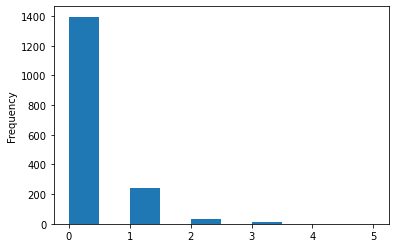

In [75]:
cleanedGolf['Wins'].plot(kind='hist',xlabel='Wins')

In [76]:
cleanedGolf['Wins_cleaned'] = [1 if x>0 else 0 for x in cleanedGolf['Wins']]
cleanedGolf.drop(columns=['Wins'],inplace=True)

## Exploratory Data Analysis

In [132]:
cleanedGolf.columns

Index(['Player Name', 'Rounds', 'Fairway Percentage', 'Year', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points',
       'Top 10', 'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR',
       'SG:ARG', 'Money', 'Wins_cleaned', 'SG ARG x Avg SG Total',
       'SG APR x Avg SG Total', 'AVG Dist x Fairway Per', 'AVG Dist x gir',
       'AVG SG PUTT x Total'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Points Vs Avg SG Total')

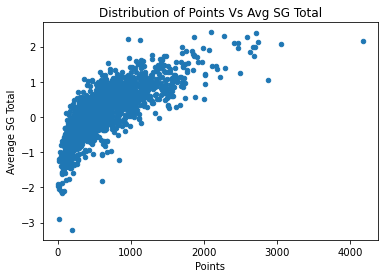

In [139]:
cleanedGolf.plot('Points','Average SG Total',kind='scatter')
plt.title('Distribution of Points Vs Avg SG Total')

Text(0.5, 1.0, 'Distribution of Points Vs Avg Score')

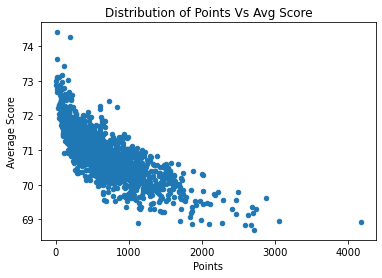

In [140]:
cleanedGolf.plot('Points','Average Score',kind='scatter')
plt.title('Distribution of Points Vs Avg Score')

Text(0.5, 1.0, 'Distrbuation of Points Vs Avg Score')

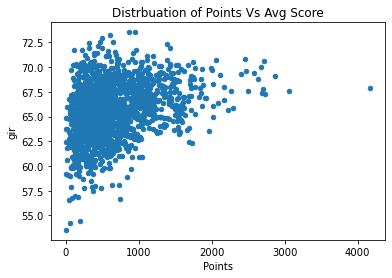

In [130]:
cleanedGolf.plot('Points','gir',kind='scatter')
plt.title('Distribution of Points Vs Avg Score')

Text(0.5, 1.0, 'Distrbuation of Points Vs Avg Score')

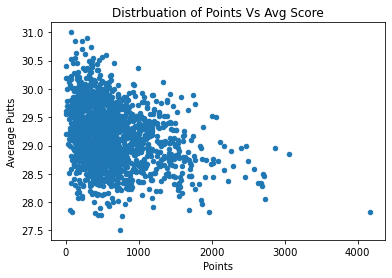

In [135]:
cleanedGolf.plot('Points','Average Putts',kind='scatter')
plt.title('Distrbuation of Points Vs Avg Score')

In [172]:
import numpy as np

<AxesSubplot:>

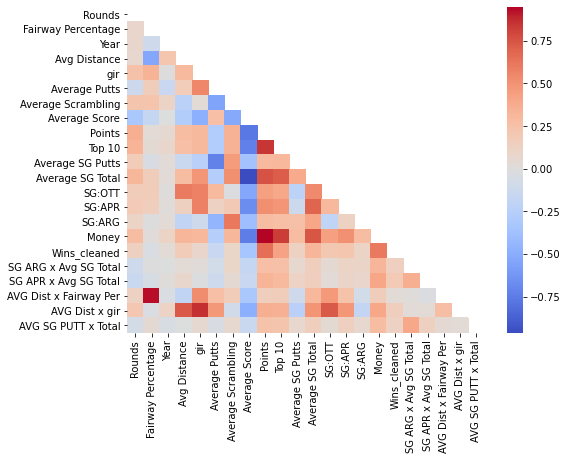

In [180]:
plt.figure(figsize=(8,6))
corr = cleanedGolf.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap='coolwarm')

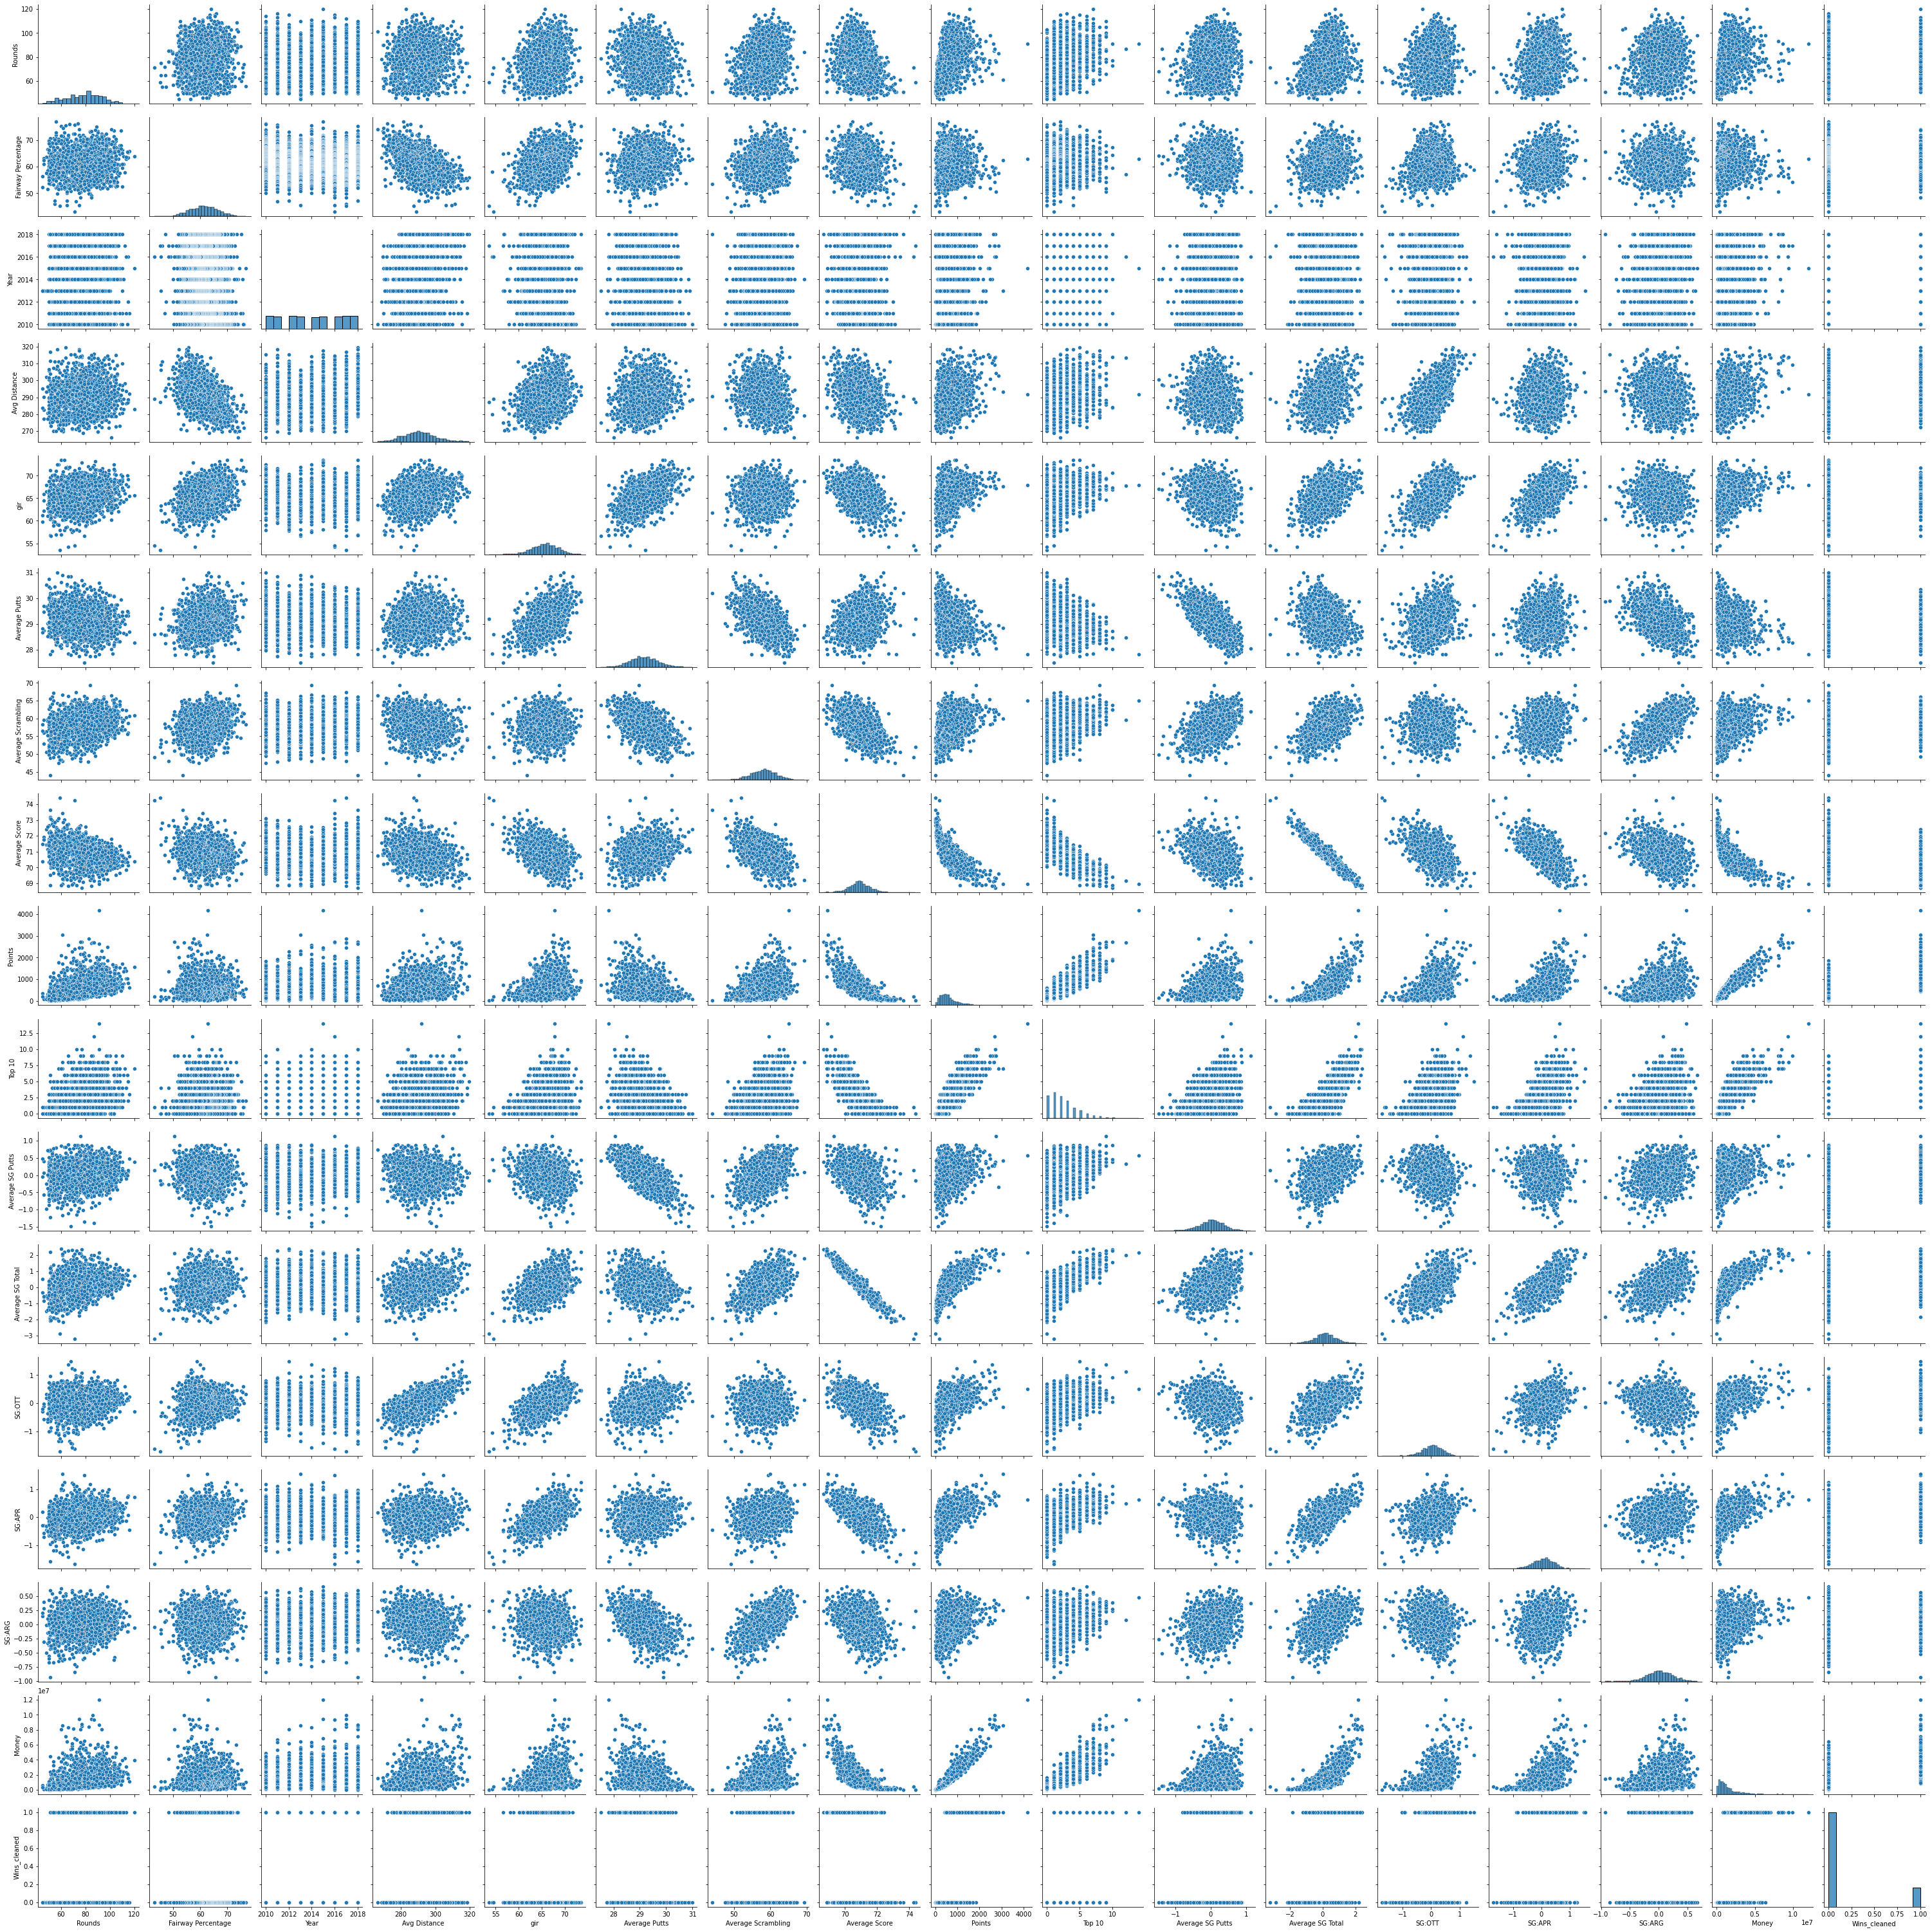

In [18]:
sns.pairplot(cleanedGolf)

<AxesSubplot:xlabel='Year'>

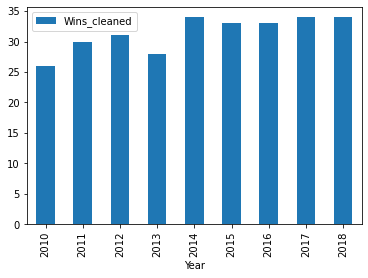

In [19]:
# No of Wins by Year
cleanedGolf.groupby(['Year'])[['Wins_cleaned']].sum().sort_values(by='Year').plot(kind='bar')

Text(0.5, 1.0, 'Highest Earners by Year')

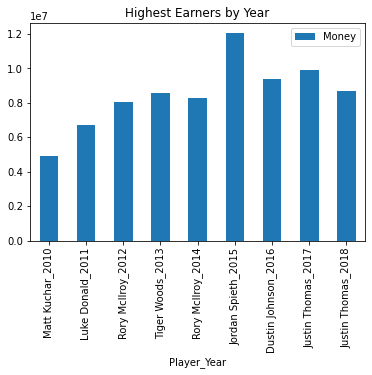

In [122]:
money_df = cleanedGolf.loc[cleanedGolf.groupby(['Year'])['Money'].idxmax()][['Player Name','Year','Money']]
money_df['Player_Year'] = money_df['Player Name'] + '_' + money_df['Year'].astype(str)
money_df.plot('Player_Year','Money',kind='bar')
plt.title('Highest Earners by Year')

<AxesSubplot:xlabel='Year'>

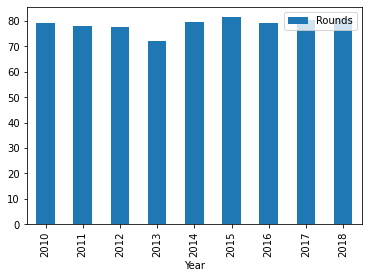

In [20]:
# No of rounds by Year
cleanedGolf.groupby(['Year'])[['Rounds']].mean().sort_values(by='Year').plot(kind='bar')

<AxesSubplot:xlabel='Year'>

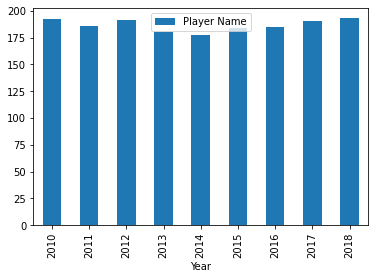

In [21]:
# No of Players by Year
cleanedGolf.groupby(['Year'])[['Player Name']].count().sort_values(by='Year').plot(kind='bar')

<AxesSubplot:xlabel='Player Name'>

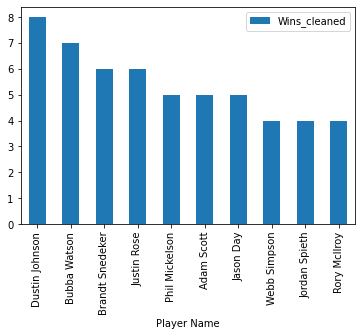

In [22]:
# Top 10 Players by Wins
cleanedGolf.groupby(['Player Name'])[['Wins_cleaned']].sum().sort_values(by='Wins_cleaned',ascending=False)[:10].plot(kind='bar')

<AxesSubplot:xlabel='Player Name'>

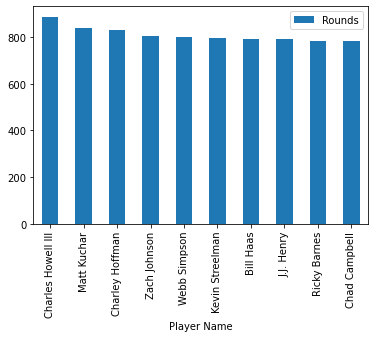

In [23]:
# Top 10 Players by Rounds
cleanedGolf.groupby(['Player Name'])[['Rounds']].sum().sort_values(by='Rounds',ascending=False)[:10].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

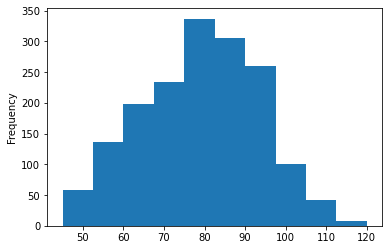

In [24]:
cleanedGolf['Rounds'].plot(kind='hist',xlabel='Rounds')

C:\Users\prakh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Points Distribution')

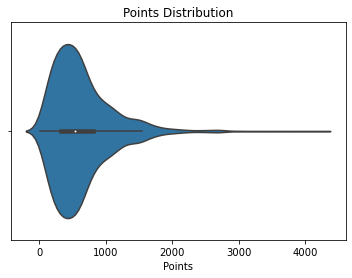

In [25]:
# Money column distribution
sns.violinplot(cleanedGolf['Points'])
plt.title('Points Distribution')

C:\Users\prakh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Points and Wins for each Year')

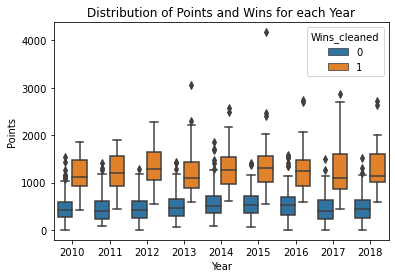

In [109]:
sns.boxplot('Year','Points',hue='Wins_cleaned',data=cleanedGolf)
plt.title('Distribution of Points and Wins for each Year')

C:\Users\prakh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Rounds and Wins for each Year')

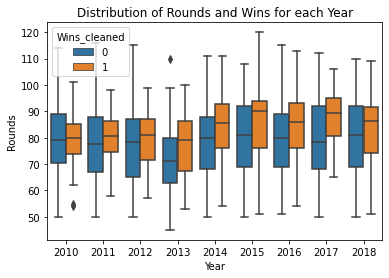

In [110]:
sns.boxplot('Year','Rounds',hue='Wins_cleaned',data=cleanedGolf)
plt.title('Distribution of Rounds and Wins for each Year')

C:\Users\prakh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Money'>

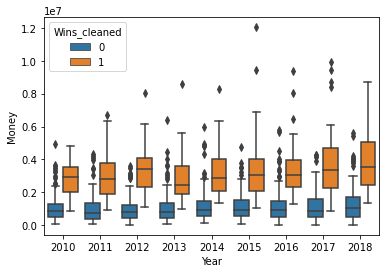

In [28]:
sns.boxplot('Year','Money',hue='Wins_cleaned',data=cleanedGolf)

Text(0, 0.5, 'Average Score')

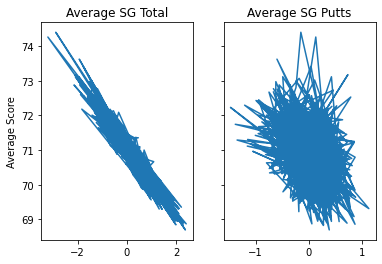

In [29]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.plot(cleanedGolf['Average SG Total'],cleanedGolf['Average Score'])
ax1.set_title('Average SG Total')
ax2.plot(cleanedGolf['Average SG Putts'],cleanedGolf['Average Score'])
ax2.set_title('Average SG Putts')

ax1.set_ylabel('Average Score')

## Linear Regression to Predict points for Year 2018

In [102]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,RidgeCV

In [31]:
train = cleanedGolf[cleanedGolf['Year']<2018]
test = cleanedGolf[cleanedGolf['Year']==2018]

X_cols = ['Rounds', 'Fairway Percentage', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score',
       'Top 10', 'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR',
       'SG:ARG', 'Money', 'Wins_cleaned']
y_col = ['Points']

X_train = train[X_cols]
y_train = train[y_col]

X_test = test[X_cols]
y_test = test[y_col]

In [32]:
lr_reg1 = LinearRegression()
lr_reg1.fit(X_train,y_train)

LinearRegression()

In [33]:
print('R Squared of the model Train Dataset: ',lr_reg1.score(X_train,y_train))

R Squared of the model Train Dataset:  0.943557006194261


In [34]:
predictions = lr_reg1.predict(X_test)
print('Mean Value of Test Points: ',y_test.mean())
print('RMSE for Linear Regression: ',math.sqrt((pow((predictions-y_test),2)).mean()))

Mean Value of Test Points:  Points    627.292746
dtype: float64
RMSE for Linear Regression:  117.30228398445263


In [35]:
print('R Squared of the model Test Dataset: ',lr_reg1.score(X_test,y_test))

R Squared of the model Test Dataset:  0.9375355063508937


## Linear Regression Excluding Money, Wins and Top 10

In [36]:
X_cols = ['Rounds', 'Fairway Percentage', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR',
       'SG:ARG',]
y_col = ['Points']

X_train = train[X_cols]
y_train = train[y_col]

X_test = test[X_cols]
y_test = test[y_col]

In [37]:
lr_reg2 = LinearRegression()
lr_reg2.fit(X_train,y_train)

LinearRegression()

In [38]:
print('R Squared of the model Train Dataset: ',lr_reg2.score(X_train,y_train))

R Squared of the model Train Dataset:  0.6433844990553371


In [39]:
predictions = lr_reg2.predict(X_test)
print('Mean Value of Test Points: ',y_test.mean())
print('RMSE for Linear Regression: ',math.sqrt((pow((predictions-y_test),2)).mean()))

Mean Value of Test Points:  Points    627.292746
dtype: float64
RMSE for Linear Regression:  282.86569103175873


In [40]:
print('R Squared of the model Test Dataset: ',lr_reg2.score(X_test,y_test))

R Squared of the model Test Dataset:  0.6367707309277059


## Linear Regression with interaction features

In [91]:
cleanedGolf.columns

Index(['Player Name', 'Rounds', 'Fairway Percentage', 'Year', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points',
       'Top 10', 'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR',
       'SG:ARG', 'Money', 'Wins_cleaned'],
      dtype='object')

In [94]:
cleanedGolf['SG ARG x Avg SG Total'] = cleanedGolf['SG:ARG']*cleanedGolf['Average SG Total']
cleanedGolf['SG APR x Avg SG Total'] = cleanedGolf['SG:APR']*cleanedGolf['Average SG Total']
cleanedGolf['AVG Dist x Fairway Per'] = cleanedGolf['Avg Distance']*cleanedGolf['Fairway Percentage']
cleanedGolf['AVG Dist x gir'] = cleanedGolf['Avg Distance']*cleanedGolf['gir']
cleanedGolf['AVG SG PUTT x Total'] = cleanedGolf['Average SG Total'] * cleanedGolf['Average SG Putts']

In [ ]:
cleanedGolf.plot('Points','AVG Dist x Fairway Per',kind='scatter')
plt.title('Distribution of Points Vs AVG Dist x Fairway Per')

In [ ]:
cleanedGolf.plot('Points','AVG Dist x gir',kind='scatter')
plt.title('Distribution of Points Vs AVG Dist x gir')

In [96]:
train = cleanedGolf[cleanedGolf['Year']<2018]
test = cleanedGolf[cleanedGolf['Year']==2018]

In [97]:
X_cols = ['Rounds', 'Fairway Percentage', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR',
       'SG:ARG','SG ARG x Avg SG Total','SG APR x Avg SG Total','AVG Dist x Fairway Per','AVG Dist x gir',
         'AVG SG PUTT x Total']

y_col = ['Points']

X_train = train[X_cols]
y_train = train[y_col]

X_test = test[X_cols]
y_test = test[y_col]

In [98]:
lr_reg2 = LinearRegression()
lr_reg2.fit(X_train,y_train)

LinearRegression()

In [99]:
print('R Squared of the model Train Dataset: ',lr_reg2.score(X_train,y_train))

R Squared of the model Train Dataset:  0.7195413905309782


In [100]:
predictions = lr_reg2.predict(X_test)
print('Mean Value of Test Points: ',y_test.mean())
print('RMSE for Linear Regression: ',math.sqrt((pow((predictions-y_test),2)).mean()))

Mean Value of Test Points:  Points    627.292746
dtype: float64
RMSE for Linear Regression:  239.98199032411307


In [101]:
print('R Squared of the model Test Dataset: ',lr_reg2.score(X_test,y_test))

R Squared of the model Test Dataset:  0.7385566564513049


## Ridge CV Regression

In [146]:
train = cleanedGolf[cleanedGolf['Year']<2018]
test = cleanedGolf[cleanedGolf['Year']==2018]

X_cols = ['Rounds', 'Fairway Percentage', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR',
       'SG:ARG','SG ARG x Avg SG Total','SG APR x Avg SG Total','AVG Dist x Fairway Per','AVG Dist x gir',
         'AVG SG PUTT x Total']

y_col = ['Points']

X_train = train[X_cols]
y_train = train[y_col]

X_test = test[X_cols]
y_test = test[y_col]

In [147]:
lr_ridge = RidgeCV(cv=5,normalize=True)
lr_ridge.fit(X_train,y_train)
lr_ridge.score(X_train,y_train)

0.7104649605426082

In [148]:
lr_ridge.alpha_

0.1

In [149]:
predictions = lr_ridge.predict(X_test)
print('Mean Value of Test Points: ',y_test.mean())
print('RMSE for Linear Regression: ',math.sqrt((pow((predictions-y_test),2)).mean()))

Mean Value of Test Points:  Points    627.292746
dtype: float64
RMSE for Linear Regression:  250.39421148184994


In [150]:
print('R Squared of the model Test Dataset: ',lr_ridge.score(X_test,y_test))

R Squared of the model Test Dataset:  0.7153777439129207


## Random Forest CV

In [374]:
from sklearn.ensemble import RandomForestRegressor

In [375]:
rf = RandomForestRegressor()

In [384]:
params = [{'n_estimators':[100,200,500],'max_depth' : [7,10,15]}]

In [385]:
clf_rf = GridSearchCV(rf,param_grid=params, cv=5,verbose=False)

In [386]:
clf_rf.fit(X_train,y_train['Points'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [7, 10, 15],
                          'n_estimators': [100, 200, 500]}],
             verbose=False)

In [387]:
clf_rf.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [389]:
rf_cv = RandomForestRegressor(n_estimators=200,max_depth=10,random_state=45)
rf_cv.fit(X_train,y_train['Points'])

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=45)

In [390]:
print('R Squared of the model Train Dataset: ',rf_cv.score(X_train,y_train))

predictions = rf_cv.predict(X_test)
print('Mean Value of Test Points: ',y_test.mean())
print('RMSE for Linear Regression: ',math.sqrt((pow((predictions-y_test['Points']),2)).mean()))

print('R Squared of the model test Dataset: ',rf_cv.score(X_test,y_test))

R Squared of the model Train Dataset:  0.9326885646069488
Mean Value of Test Points:  Points    627.292746
dtype: float64
RMSE for Linear Regression:  236.7596211136079
R Squared of the model test Dataset:  0.745530603515848


## Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [392]:
gbm = GradientBoostingRegressor(n_estimators=500,random_state=45)
gbm.fit(X_train,y_train)

C:\Users\prakh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(n_estimators=500, random_state=45)

In [393]:
print('R Squared of the model Train Dataset: ',gbm.score(X_train,y_train))

R Squared of the model Train Dataset:  0.9592423734775931


In [394]:
predictions = gbm.predict(X_test)
print('Mean Value of Test Points: ',y_test.mean())
print('RMSE for Linear Regression: ',math.sqrt((pow((predictions-y_test['Points']),2)).mean()))

Mean Value of Test Points:  Points    627.292746
dtype: float64
RMSE for Linear Regression:  236.41372402645686


In [395]:
print('R Squared of the model test Dataset: ',gbm.score(X_test,y_test))

R Squared of the model test Dataset:  0.7462736012064771


## Gradient Boosting with CV

In [152]:
gbm = GradientBoostingRegressor(random_state=45)

In [155]:
params = [{'n_estimators':[100,200],'max_depth' : [3,5],'min_samples_leaf':[1,2,4]}]

In [156]:
clf = GridSearchCV(gbm,param_grid=params, cv=5)

In [157]:
clf.fit(X_train,y_train['Points'])

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=45),
             param_grid=[{'max_depth': [3, 5], 'min_samples_leaf': [1, 2, 4],
                          'n_estimators': [100, 200]}])

In [158]:
cross_val_score(GradientBoostingRegressor(n_estimators=100,max_depth=3,random_state=45,learning_rate=0.1),X_train,y_train,cv=5)

C:\Users\prakh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\prakh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\prakh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\prakh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

array([0.6414214 , 0.69486968, 0.66436681, 0.65561707, 0.73296404])

In [159]:
clf.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 100}

In [160]:
gbm_cv = GradientBoostingRegressor(n_estimators=100,max_depth=3,random_state=45)
gbm_cv.fit(X_train,y_train['Points'])

GradientBoostingRegressor(random_state=45)

In [161]:
print('R Squared of the model Train Dataset: ',gbm_cv.score(X_train,y_train))

predictions = gbm_cv.predict(X_test)
print('Mean Value of Test Points: ',y_test.mean())
print('RMSE for Linear Regression: ',math.sqrt((pow((predictions-y_test['Points']),2)).mean()))

print('R Squared of the model test Dataset: ',gbm_cv.score(X_test,y_test))

R Squared of the model Train Dataset:  0.8564129337456251
Mean Value of Test Points:  Points    627.292746
dtype: float64
RMSE for Linear Regression:  223.38157027186205
R Squared of the model test Dataset:  0.7734756117509571


## Gradient Boosting feature importance

Text(0.5, 1.0, 'Gradient Boosting Feature Importance')

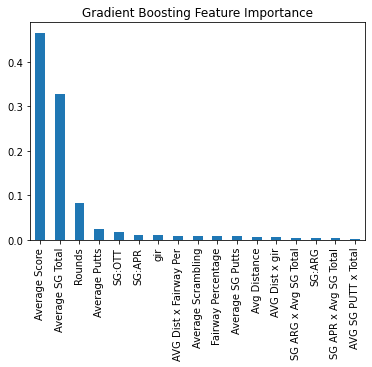

In [162]:
pd.Series(gbm_cv.feature_importances_,X_test.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Gradient Boosting Feature Importance')